# LB6

In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

## PART 1

In [40]:
data = pd.read_csv('data/CC GENERAL.csv').iloc[:,1:].dropna()
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [41]:
no_labeled_data = pd.DataFrame(data=data.values)
no_labeled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0


## PART 2

In [42]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [43]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [44]:
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


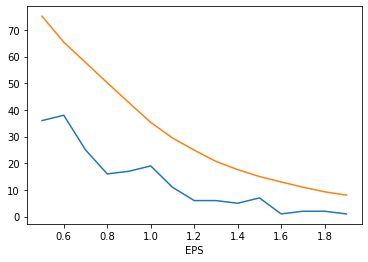

In [57]:
eps_range = np.arange(0.5, 2, 0.1)

clust_n = []
clust_failure = []

for eps in eps_range:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

plt.xlabel("EPS")

plt.plot(eps_range, clust_n)
plt.plot(eps_range, clust_failure)

In [59]:
for i in range(len(eps_range)):
    print(eps_range[i], clust_n[i], clust_failure[i])
    if clust_n[i] <= 7 and clust_n[i] >=5 and clust_failure[i] <= 12:
        print(eps_range[i])

0.5 36 75.12737378415933
0.6 38 65.42380731820288
0.7 25 57.79295970356647
0.7999999999999999 16 50.196850393700785
0.8999999999999999 17 42.693376563223715
0.9999999999999999 19 35.32885595182955
1.0999999999999999 11 29.469661880500233
1.1999999999999997 6 24.930523390458546
1.2999999999999998 6 20.69245020842983
1.4 5 17.612320518758686
1.4999999999999998 7 15.01852709587772
1.5999999999999996 1 12.980546549328393
1.6999999999999997 2 11.023622047244094
1.7999999999999998 2 9.286706808707734
1.8999999999999997 1 8.047707271885132


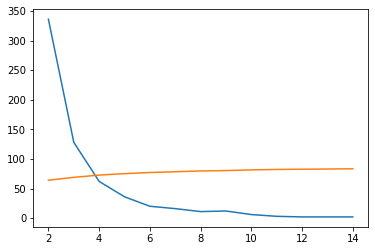

In [47]:
min_samples_range = range(2, 15)

clust_n = []
clust_failure = []

for min_samples in min_samples_range:
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

plt.plot(min_samples_range, clust_n)
plt.plot(min_samples_range, clust_failure)

In [55]:
for i in range(len(min_samples_range)):
    print(clust_n[i], clust_failure[i])
    if clust_n[i] <= 7 and clust_n[i] >=5 and clust_failure[i] <= 12:
        print(min_samples_range[i])

336 64.02269569245021
128 68.83974062065771
62 72.67253358036128
36 75.12737378415933
20 77.02640111162576
16 78.36961556276054
11 79.6317739694303
12 80.33811949976841
6 81.41500694766096
3 82.2024085224641
2 82.60768874478926
2 82.90875405280222
2 83.32561371005094


In [60]:
clustering = DBSCAN().fit(scaled_data)
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)

In [61]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

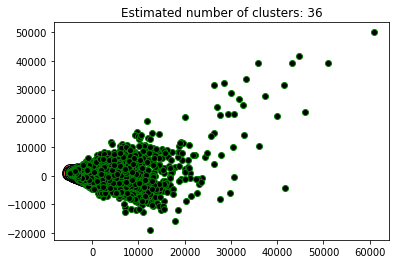

In [62]:
unique_labels = set(labels)
colors = [cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='g', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## OPTICS

In [51]:
clustering = OPTICS().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(list(clustering.labels_).count(-1) /len(list(clustering.labels_)))